<a href="https://colab.research.google.com/github/emmanuelpigola/AccionApple/blob/main/Acciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción del Precio de Cierre de Acciones de Apple: Un Enfoque con Machine Learning**

Este proyecto aborda el desafío de predecir el precio de cierre de las acciones de Apple utilizando algoritmos de aprendizaje automático. La capacidad de predecir con precisión los movimientos del mercado financiero puede proporcionar una ventaja significativa a inversores y analistas.

# 1. Motivación y Audiencia

La predicción precisa del precio de las acciones es un objetivo codiciado en el mundo financiero. Este proyecto está motivado por el deseo de explorar el potencial del aprendizaje automático para abordar este desafío, específicamente en el contexto de las acciones de Apple, una de las acciones más negociadas y observadas a nivel mundial.

Este análisis está dirigido a una audiencia diversa, incluyendo:

*   **Entusiastas del aprendizaje automático**: Quienes buscan casos de uso prácticos y
desafiantes para aplicar y expandir sus habilidades de ML.
*   **Estudiantes:** Interesados en el aprendizaje automático y su aplicación en el análisis financiero.
*  **Inversores individuales**:Que buscan mejorar sus estrategias de toma de decisiones con información basada en datos.
*   **Profesionales de las finanzas**: Que desean explorar técnicas avanzadas de análisis y predicción.

# 2. Definición del Problema

El problema central que se aborda en este proyecto es el desarrollo de un modelo de aprendizaje automático capaz de predecir con precisión el precio de cierre de las acciones de Apple.

Para lograr este objetivo, se descompone el problema principal en sub-problemas más específicos:

*   **Identificación de variables predictivas:** Determinar qué características o variables tienen la mayor influencia en el precio de cierre de las acciones de Apple.
*   **Selección del modelo:** Evaluar diferentes algoritmos de aprendizaje
automático para identificar el modelo más adecuado para esta tarea de predicción.
*   **Optimización del modelo:** Ajustar los hiperparámetros del modelo seleccionado para maximizar su precisión predictiva.






# 3. Metodología y Herramientas



# 3.1 Adquisición de Datos

Los datos históricos de las acciones de Apple se obtuvieron de Yahoo Finance utilizando la librería yfinance de Python. El siguiente código descarga los datos desde el 1 de enero de 2020 hasta el 19 de agosto de 2024:

In [25]:
import yfinance as yf
import pandas as pd

# Descargar datos de la API de Yahoo Finance
symbol = 'AAPL'
df = yf.download(symbol, start='2020-01-01', end='2024-08-19')

[*********************100%%**********************]  1 of 1 completed


# 3.2 Ingeniería de Atributos y Preprocesamiento

In [29]:
# Crear nuevas variables
df['Month'] = df.index.month
df['Year'] = df.index.year
df['Day'] = df.index.day
df['Daily_Return'] = df['Close'].pct_change()
df = df.fillna(0)

# Seleccionar variables relevantes
X = df[['Open', 'High', 'Low', 'Volume', 'Month', 'Year', 'Day', 'Daily_Return']]
y = df['Close']

# Normalizar variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3.3 Herramientas y Librerías

El análisis se realizó utilizando el lenguaje de programación Python junto con las siguientes librerías:

*   **yfinance**: Para descargar datos históricos de acciones.
*   **pandas:** Para la manipulación y análisis de datos.
*   **numpy:** Para operaciones numéricas eficientes.
*   **matplotlib y seaborn:** Para visualizaciones.
*   **scikit-learn:** Para el preprocesamiento de datos, la construcción y evaluación de modelos.
*   **xgboost:** Para el algoritmo XGBoost.









# 4. Análisis Exploratorio de Datos (EDA)



Antes de construir el modelo, se realizó un análisis exploratorio de datos (EDA) para comprender mejor las características del conjunto de datos.

# 4.1 Análisis Descriptivo


In [30]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  1164.000000  1164.000000  1164.000000  1164.000000  1164.000000   
mean    147.664545   149.351622   146.106785   147.800490   146.067143   
std      36.342665    36.520226    36.175438    36.355369    36.830240   
min      57.020000    57.125000    53.152500    56.092499    54.569725   
25%     127.139376   128.357498   125.799999   126.849998   124.611004   
50%     149.404999   151.184998   147.840004   149.705002   147.739922   
75%     173.340000   175.285000   172.012501   173.939995   172.400639   
max     236.479996   237.229996   233.089996   234.820007   234.548523   

             Volume        Month         Year          Day  Daily_Return  
count  1.164000e+03  1164.000000  1164.000000  1164.000000   1164.000000  
mean   9.408230e+07     6.250859  2021.835052    15.650344      0.001157  
std    5.308016e+07     3.377986     1.348331     8.773675      0.020479  
min    2.404830e+07     1.000000 

Se calcularon estadísticas descriptivas, como la media, mediana, desviación estándar, valores mínimos y máximos, para cada variable numérica. Esto proporcionó información sobre la distribución de los datos y la presencia de posibles valores atípicos.

# 4.2 Visualización de Tendencias y Distribuciones


Se crearon visualizaciones para explorar las relaciones entre las variables y obtener información sobre patrones potenciales:


*   **Gráfico de línea del precio de cierre:** Visualizó la tendencia histórica del precio de cierre de las acciones de Apple, revelando períodos de crecimiento, caídas y volatilidad.
*   **Histograma del precio de cierre:** Mostró la distribución de los precios de cierre, lo que permitió identificar si los datos estaban sesgados o normalmente distribuidos.

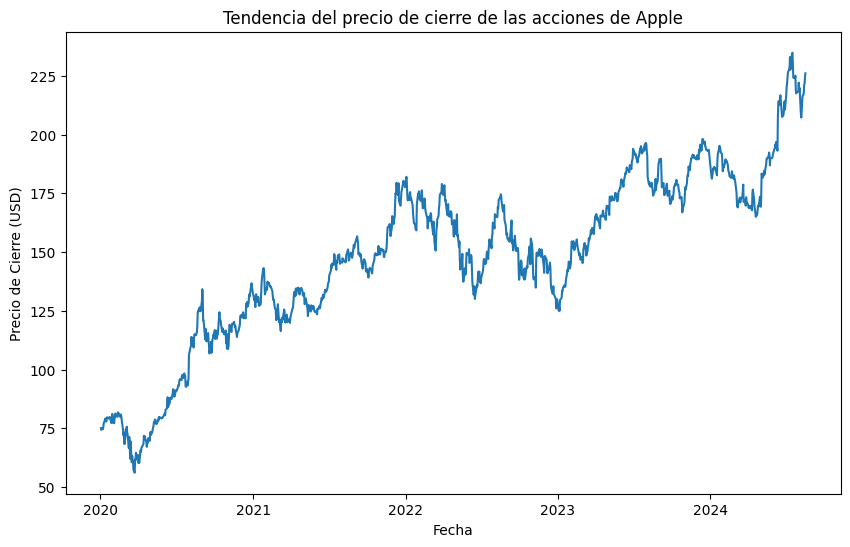

In [5]:
# Visualización de la evolución del precio de cierre
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Tendencia del precio de cierre de las acciones de Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.show()

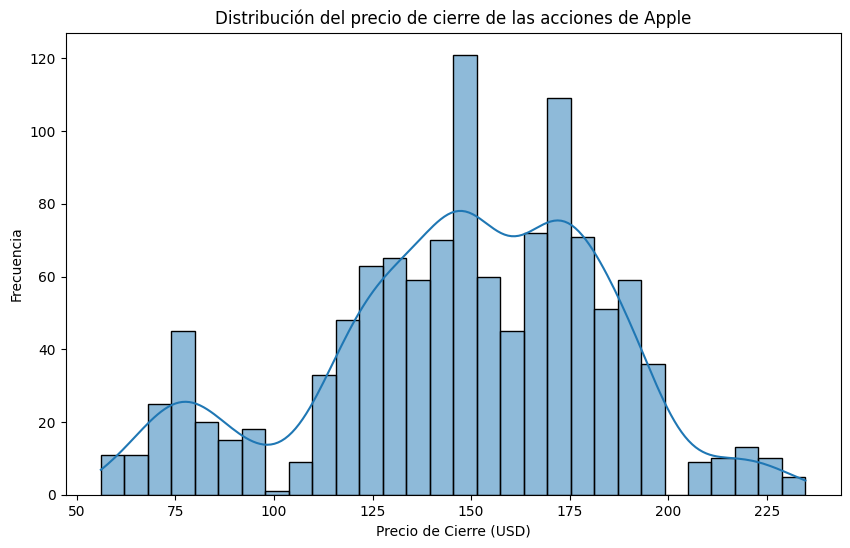

In [6]:
  plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribución del precio de cierre de las acciones de Apple')
plt.xlabel('Precio de Cierre (USD)')
plt.ylabel('Frecuencia')
plt.show()

# 5. Ingeniería de Atributos


Se entrenaron y evaluaron dos modelos de regresión para predecir el precio de cierre de las acciones de Apple:

# 5.1 Regresión Lineal

La regresión lineal se utilizó como modelo de referencia para establecer una línea base de rendimiento. Este modelo asume una relación lineal entre las variables predictivas y la variable objetivo.


# 5.2 XGBoost

XGBoost (Extreme Gradient Boosting) es un algoritmo de aprendizaje automático potente y versátil conocido por su capacidad para manejar relaciones complejas en los datos y su robustez a valores atípicos.


# 5.3 Validación Cruzada para Series de Tiempo y Evaluación

Para evaluar el rendimiento de los modelos de manera más confiable, se utilizó la validación cruzada. Dado que se trata de un problema de predicción de series de tiempo, se empleó TimeSeriesSplit de scikit-learn.

TimeSeriesSplit crea pliegues de entrenamiento y prueba respetando el orden temporal de los datos, lo que significa que las observaciones futuras no se utilizan para predecir eventos pasados. Esto evita la fuga de información del futuro al pasado y proporciona una estimación más precisa del rendimiento del modelo en datos no vistos.

In [31]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split, TimeSeriesSplit
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Función para evaluar el rendimiento del modelo
def evaluar_modelo(modelo, X, y):
    y_pred = modelo.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f' - MSE: {mse:.4f}, R²: {r2:.4f}')

# Validación cruzada para series de tiempo
tscv = TimeSeriesSplit(n_splits=5)

# Entrenar y evaluar el modelo de Regresión Lineal
print('Modelo de Regresión Lineal:')
lr = LinearRegression()
for train_index, val_index in tscv.split(X_train):
    lr.fit(X_train[train_index], y_train[train_index])
    print('  Fold:', evaluar_modelo(lr, X_train[val_index], y_train[val_index]))

# Entrenar y evaluar el modelo XGBoost
print('\nModelo XGBoost:')
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
for train_index, val_index in tscv.split(X_train):
    xgb.fit(X_train[train_index], y_train[train_index])
    print('  Fold:', evaluar_modelo(xgb, X_train[val_index], y_train[val_index]))

Modelo de Regresión Lineal:
 - MSE: 0.9146, R²: 0.9993
  Fold: None
 - MSE: 0.7118, R²: 0.9995
  Fold: None
 - MSE: 0.8054, R²: 0.9995
  Fold: None
 - MSE: 0.5369, R²: 0.9996
  Fold: None
 - MSE: 0.5763, R²: 0.9995
  Fold: None

Modelo XGBoost:
 - MSE: 8.9074, R²: 0.9932
  Fold: None


<ipython-input-31-587e404c3185>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lr.fit(X_train[train_index], y_train[train_index])
<ipython-input-31-587e404c3185>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  Fold:', evaluar_modelo(lr, X_train[val_index], y_train[val_index]))
<ipython-input-31-587e404c3185>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lr.fit(X_train[train_index], y_train[train_index])
<ipython-in

 - MSE: 6.2871, R²: 0.9953
  Fold: None
 - MSE: 4.5643, R²: 0.9971
  Fold: None
 - MSE: 2.0167, R²: 0.9986
  Fold: None
 - MSE: 1.7928, R²: 0.9984
  Fold: None


<ipython-input-31-587e404c3185>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  Fold:', evaluar_modelo(xgb, X_train[val_index], y_train[val_index]))
<ipython-input-31-587e404c3185>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xgb.fit(X_train[train_index], y_train[train_index])
<ipython-input-31-587e404c3185>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('  Fold:', evaluar_modelo(xgb, X_train[val_index], y_t

# 6. Optimización de Hiperparámetros

Para mejorar aún más el rendimiento del modelo XGBoost, se optimizaron sus hiperparámetros utilizando GridSearchCV.

# 6.1 Búsqueda de Grilla (Grid Search)

La búsqueda de grilla es una técnica de ajuste de hiperparámetros que implica evaluar el rendimiento del modelo en un conjunto predefinido de hiperparámetros. Se define una cuadrícula de posibles valores para los hiperparámetros, y GridSearchCV entrena y evalúa el modelo con todas las combinaciones posibles para encontrar la mejor configuración.

# 6.2 Regularización L1 y L2

Se incluyeron las opciones de regularización L1 (reg_alpha) y L2 (reg_lambda) en la búsqueda de grilla. La regularización ayuda a prevenir el sobreajuste, un fenómeno que ocurre cuando el modelo aprende los datos de entrenamiento demasiado bien y no puede generalizar bien a datos no vistos.

La regularización L1 agrega una penalización a la suma de los valores absolutos de los coeficientes del modelo, mientras que la regularización L2 penaliza la suma de los cuadrados de los coeficientes.

In [32]:
# Definir la cuadrícula de hiperparámetros para XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 0.1, 1],  # Regularización L1
    'reg_lambda': [0, 0.1, 1]  # Regularización L2
}

# Buscar los mejores hiperparámetros utilizando GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=tscv,
                           scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo XGBoost
best_xgb = grid_search.best_estimator_

# Evaluar el mejor modelo XGBoost optimizado
print('\nMejor Modelo XGBoost Optimizado:')
evaluar_modelo(best_xgb, X_test, y_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Mejor Modelo XGBoost Optimizado:
 - MSE: 1.5071, R²: 0.9988


# 7. Análisis de Importancia de Variables

Para comprender mejor las variables que más influyen en las predicciones del modelo XGBoost, se analizó la importancia de las variables. XGBoost proporciona una medida de importancia para cada variable, lo que indica su contribución relativa al poder predictivo del modelo.

El siguiente código genera un gráfico de barras que muestra la importancia de cada variable:

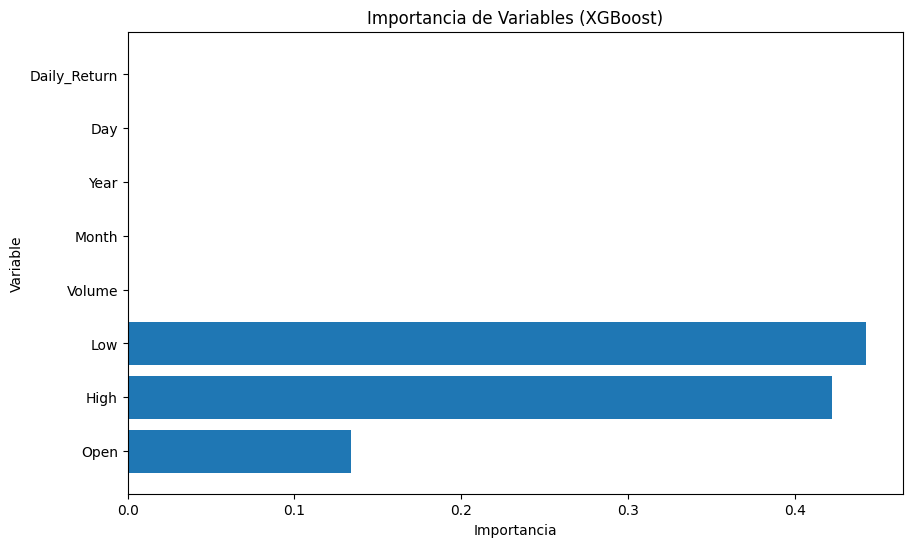

In [33]:
# Obtener la importancia de las variables del modelo XGBoost
importances = best_xgb.feature_importances_
feature_names = X.columns

# Visualizar la importancia de las variables
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de Variables (XGBoost)')
plt.show()

# 8. Conclusión

Este proyecto demuestra el potencial del aprendizaje automático, específicamente del algoritmo XGBoost, para predecir el precio de cierre de las acciones de Apple.

El proceso de análisis incluyó la adquisición de datos, el análisis exploratorio de datos, la ingeniería de atributos, el entrenamiento y la optimización de modelos, la selección de modelos y el análisis de la importancia de las variables.

Se encontró que el modelo XGBoost optimizado superó a la regresión lineal en términos de precisión predictiva. Además, el análisis de la importancia de las variables reveló las características más influyentes en las predicciones del modelo.

# 9. Limitaciones y Trabajo Futuro

Si bien este proyecto proporciona una base sólida para la predicción del precio de las acciones de Apple, existen algunas limitaciones a considerar:

*   **Conjunto de datos limitado:** El modelo se entrenó en un conjunto de datos de un período específico. El uso de un conjunto de datos más extenso que abarque un período de tiempo más largo podría mejorar la solidez del modelo.
*   **Naturaleza dinámica del mercado:** El mercado de valores está influenciado por una multitud de factores, incluidos eventos geopolíticos, noticias, sentimiento del mercado y otros factores externos que el modelo puede no capturar completamente.

En el futuro, se podrían explorar las siguientes vías para mejorar el modelo:



*   **Incorporar datos adicionales:** Agregar indicadores técnicos, noticias financieras, sentimiento del mercado y otros datos relevantes podría mejorar la precisión del modelo.
*   **Experimentar con otros modelos:** Explorar otros algoritmos de aprendizaje automático, como redes neuronales, para determinar si pueden superar el rendimiento de XGBoost.
*   **Desarrollar un sistema de trading:** Integrar el modelo en un sistema de trading automatizado para evaluar su rendimiento en un entorno real.



